<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dump-the-Dataset" data-toc-modified-id="Dump-the-Dataset-1">Dump the Dataset</a></span></li><li><span><a href="#Pseudolabel-Loading-from-TFDS" data-toc-modified-id="Pseudolabel-Loading-from-TFDS-2">Pseudolabel Loading from TFDS</a></span><ul class="toc-item"><li><span><a href="#Extract-all-routes" data-toc-modified-id="Extract-all-routes-2.1">Extract all routes</a></span></li></ul></li></ul></div>

In [9]:
import sys 
print(sys.path)
from bfseg.data.fsdata import load_fsdata
import tensorflow as tf
import os
import json

['', '/opt/ros/noetic/lib/python3/dist-packages', '/home/matthias/anaconda3/envs/bfs1/lib/python36.zip', '/home/matthias/anaconda3/envs/bfs1/lib/python3.6', '/home/matthias/anaconda3/envs/bfs1/lib/python3.6/lib-dynload', '/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages', '/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/IPython/extensions', '/home/matthias/.ipython']


ModuleNotFoundError: No module named 'bfseg.data'

In [6]:
%cd /home/matthias/git/background_foreground_segmentation/src


/home/matthias/git/background_foreground_segmentation/src


In [7]:
%pwd

'/home/matthias/git/background_foreground_segmentation/src'

In [2]:
datapath = '/home/matthias/data/rss_2021_data/label_aggregator/full'
if not os.path.exists(os.path.join(datapath, 'dataset_info.json')):
    with open(os.path.join(datapath, 'dataset_info.json'), 'w') as f:
        json.dump({
            'output_shapes': {'rgb': [None, None, 3], 'labels': [None, None]},
            'output_types': {'rgb': 'float32', 'labels': 'int32'}
        }, f)
ds = load_fsdata(datapath)

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


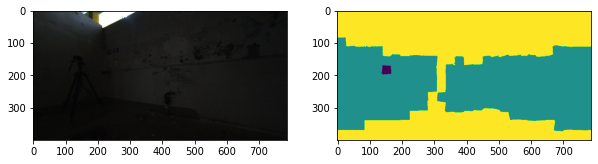

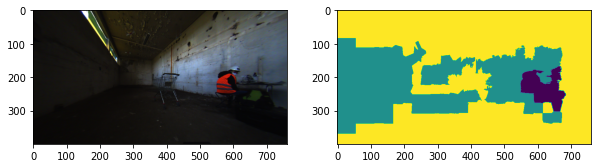

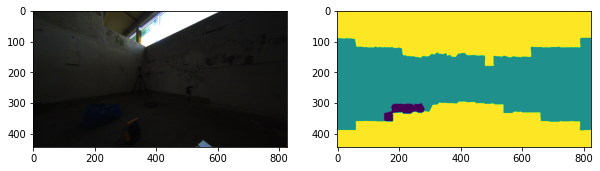

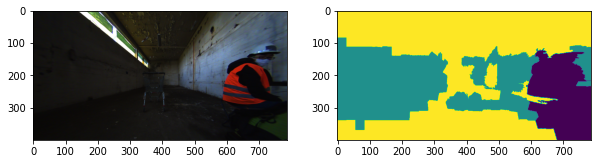

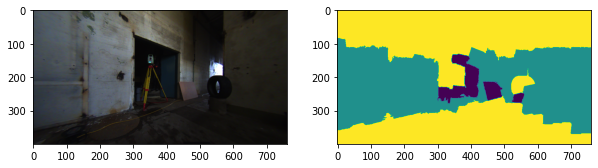

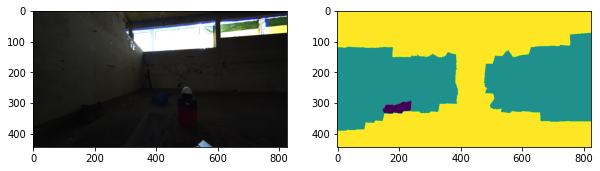

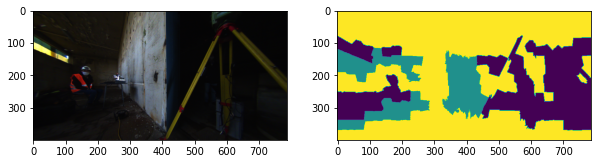

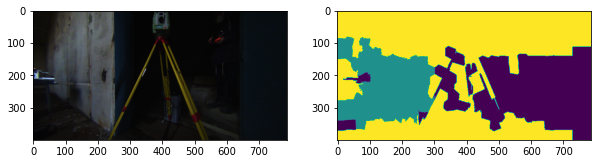

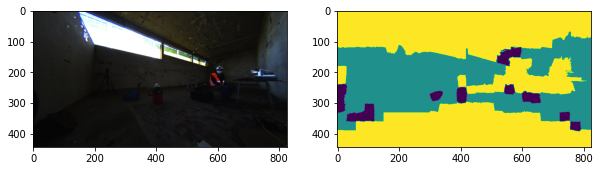

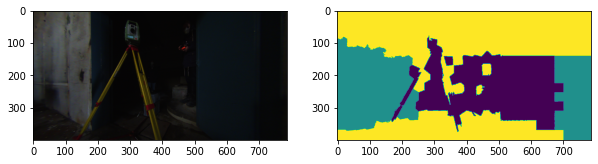

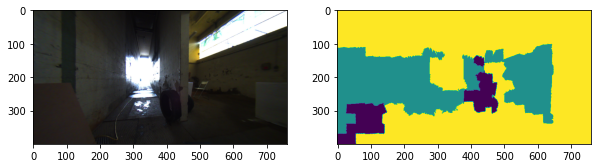

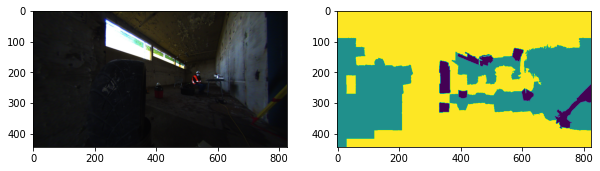

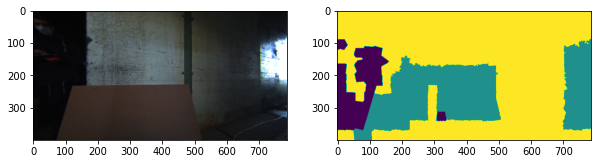

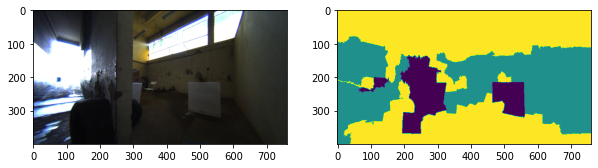

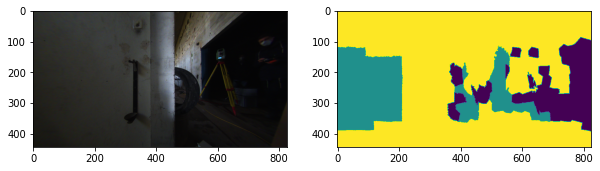

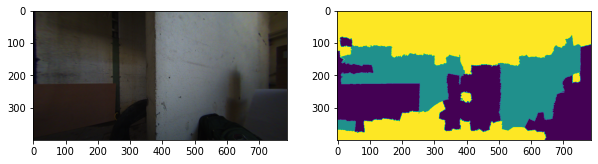

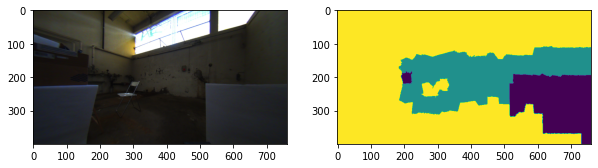

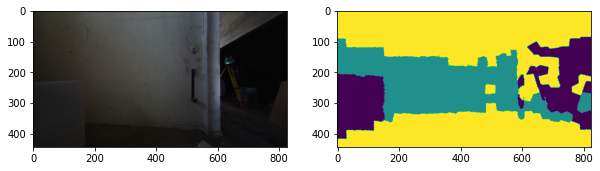

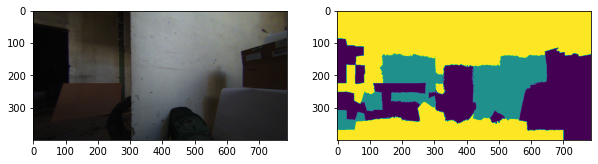

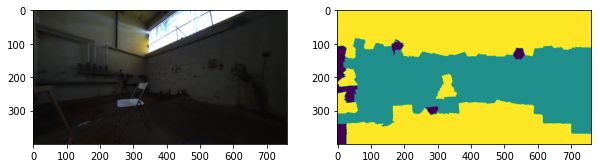

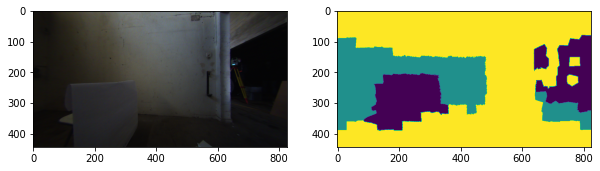

In [5]:
import matplotlib.pyplot as plt
for blob in ds.skip(50).take(260).shard(10, 0).as_numpy_iterator():
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(blob['rgb'] / 255)
    axs[1].imshow(blob['labels'])

/home/matthias/anaconda3/envs/bfs1/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


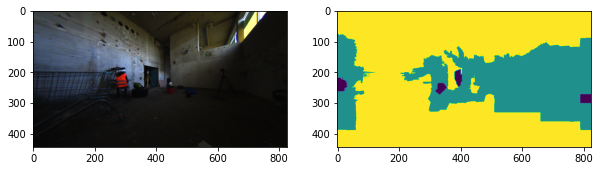

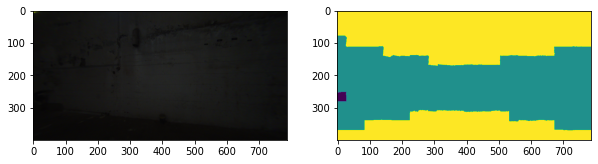

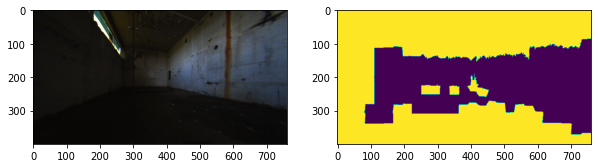

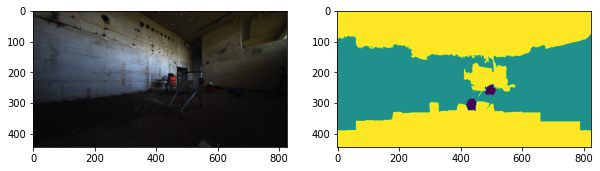

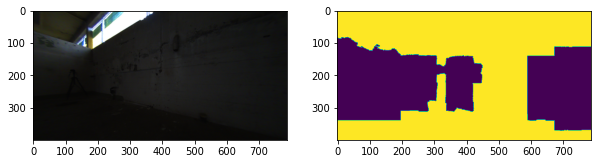

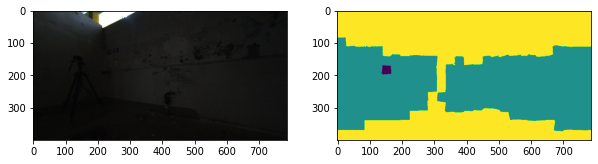

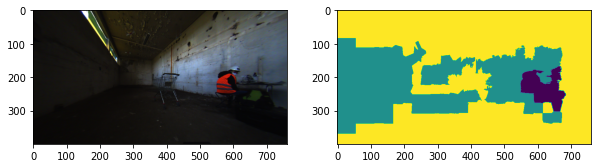

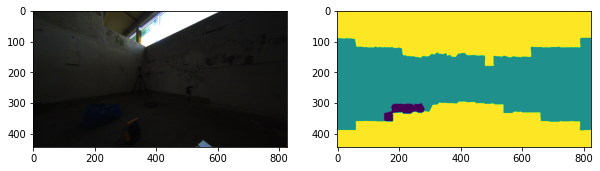

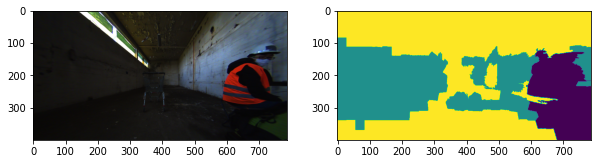

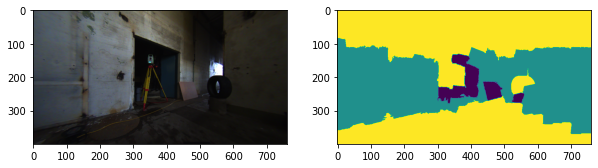

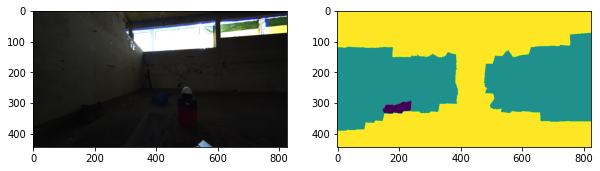

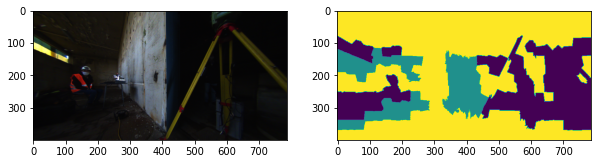

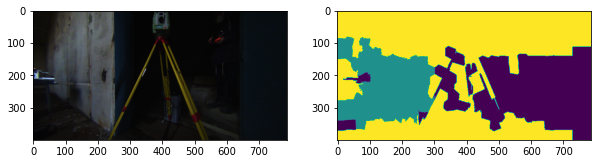

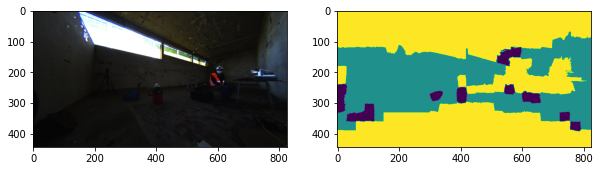

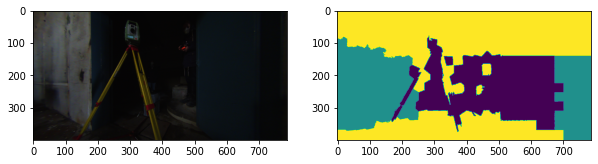

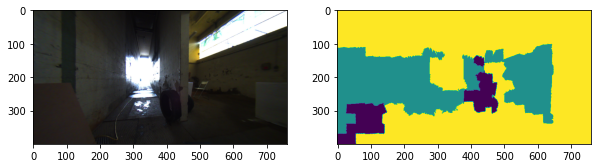

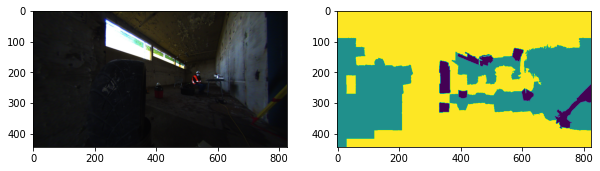

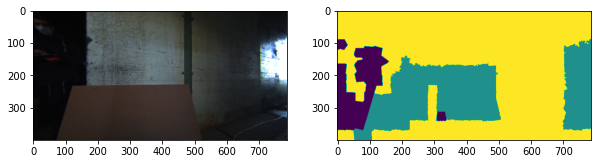

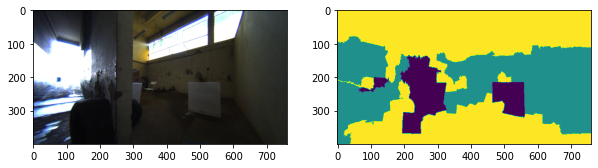

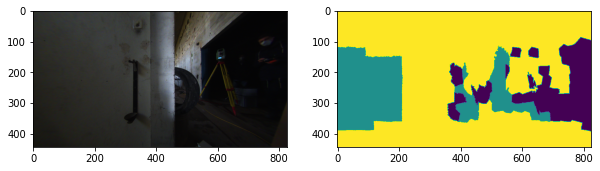

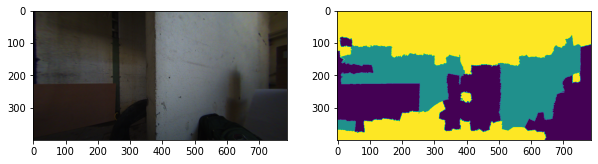

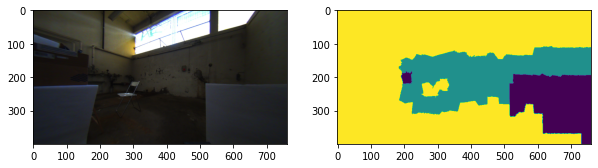

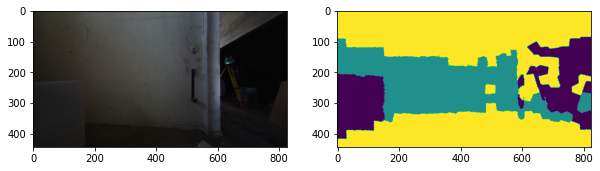

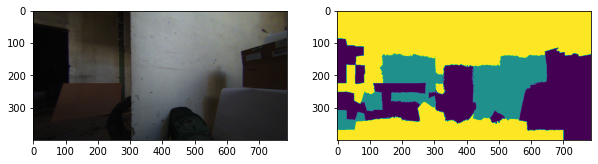

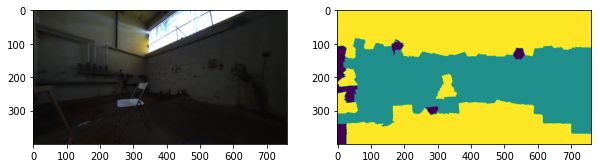

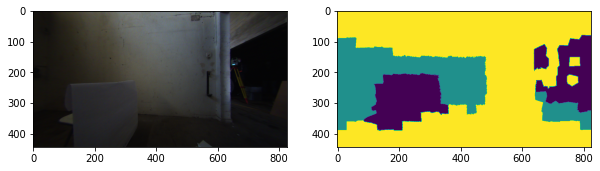

In [4]:
import matplotlib.pyplot as plt
datapath = '/home/matthias/data/rss_2021_data/label_aggregator/full_dyn_5'
ds = load_fsdata(datapath).skip(50).take(260)
for blob in ds.shard(10, 0).as_numpy_iterator():
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(blob['rgb'] / 255)
    axs[1].imshow(blob['labels'])

# Dump the Dataset

In [54]:
new_datapath = datapath + '_dump'
!mkdir {new_datapath}
from bfseg.data.fsdata import dump_dataset
dump_dataset(ds, new_datapath, only_modalities=['rgb', 'labels'])


mkdir: cannot create directory '/home/blumh/asl/rss_2021_data/pickelhaube_full_office4_agreement_dump': File exists


In [55]:
!scp -r {new_datapath} leonhard:/cluster/work/riner/users/blumh/

0165_labels.png                               100% 6851     1.6MB/s   00:00    
0195_rgb.png                                  100%  496KB  32.6MB/s   00:00    
0057_rgb.png                                  100%  419KB  35.3MB/s   00:00    
0234_labels.png                               100% 7582     1.6MB/s   00:00    
0041_labels.png                               100% 7751     1.9MB/s   00:00    
0208_rgb.png                                  100%  433KB  35.7MB/s   00:00    
0256_rgb.png                                  100%  516KB  36.5MB/s   00:00    
0074_rgb.png                                  100%  439KB  36.3MB/s   00:00    
0097_labels.png                               100% 5853     1.3MB/s   00:00    
0205_rgb.png                                  100%  422KB  34.6MB/s   00:00    
0137_rgb.png                                  100%  418KB  36.9MB/s   00:00    
0115_rgb.png                                  100%  463KB  38.4MB/s   00:00    
0148_labels.png                         

In [23]:
from shutil import make_archive

make_archive(datapath, 'zip', datapath)

'/home/blumh/asl/rss_2021_data/pickelhaube_full_office4.zip'

In [24]:
!rclone copy {datapath}.zip construction:/background_foreground_segmentation_paper/pseudolabels/

In [28]:
# special direct transfer to leonhard
!scp -r {datapath} leonhard:/cluster/work/riner/users/blumh/

1613643635035069000_cam2_labels.png           100% 6479   885.8KB/s   00:00    
1613643715304777000_cam1_labels.png           100% 6237     1.0MB/s   00:00    
1613643728449461000_cam1_labels.png           100% 6145   908.0KB/s   00:00    
1613643650429960000_cam2_rgb.png              100%  421KB  32.8MB/s   00:00    
1613643743594011000_cam2_labels.png           100% 6675     1.1MB/s   00:00    
1613643760187661000_cam0_rgb.png              100%  502KB  23.2MB/s   00:00    
1613643730498467000_cam0_labels.png           100% 7065   772.4KB/s   00:00    
1613643675621343000_cam1_labels.png           100% 4878   341.6KB/s   00:00    
1613643656877897000_cam2_rgb.png              100%  436KB  23.6MB/s   00:00    
1613643712256364000_cam1_labels.png           100% 7362   486.7KB/s   00:00    
1613643746092781000_cam1_labels.png           100% 6930   811.8KB/s   00:00    
1613643642032792000_cam2_labels.png           100% 7389   532.9KB/s   00:00    
1613643629986206000_cam1_rgb.png        

In [1]:
import bfseg.data.pseudolabels
import tensorflow_datasets as tfds

tfds.load('meshdist_pseudolabels')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating rumlang3 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang3.tfrecord...:   0%|          | 0/391 [00:00<?, ? examples/s]

Generating rumlang2 examples...: 0 examples [00:00, ? examples/s]

Shuffling meshdist_pseudolabels-rumlang2.tfrecord...:   0%|          | 0/268 [00:00<?, ? examples/s]

Dataset meshdist_pseudolabels downloaded and prepared to /home/blumh/tensorflow_datasets/meshdist_pseudolabels/0.1.0. Subsequent calls will reuse this data.


{'rumlang3': <PrefetchDataset shapes: {filename: (), image: (None, None, 3), label: (None, None, 1)}, types: {filename: tf.string, image: tf.uint8, label: tf.uint8}>,
 'rumlang2': <PrefetchDataset shapes: {filename: (), image: (None, None, 3), label: (None, None, 1)}, types: {filename: tf.string, image: tf.uint8, label: tf.uint8}>}

## Extract all routes

In [92]:
regex_pattern = "(.*)_img_(\d+)_semseg\.png"
all_labels = dl_cla.labels

In [93]:
all_routes = set([re.search(regex_pattern, os.path.basename(label)).group(1) for label in all_labels])

In [94]:
dataset_information = {}

In [95]:
for route in all_routes:
    print(route)
    info_file = os.path.join(train_path, f"{route}_info.txt")
    dataset_information[route] = pd.read_csv(info_file, header=None, sep=',|;', engine="python")

cam0
cam1
cam2


In [96]:
img_timestamps = []
for label in all_labels:
    match = re.search(regex_pattern, os.path.basename(label))
    route, number = match.group(1), int(match.group(2))
    timestamp = dataset_information[route].iloc[number,1]
    img_timestamps.append(route +"_"+ str(timestamp))

In [97]:
datasets = [("CLA_FUSED", ds_cla, img_timestamps)]

In [98]:
dump_meshdist_ds_to_h5(datasets, dump_depth = False)

In [27]:
import bfseg.data.nyu_subsampled
import tensorflow_datasets as tfds

tfds.load('nyu_subsampled')

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html